<a href="https://colab.research.google.com/github/silva-felipe/BootCamp_Alura_DataScience/blob/main/notebooks/modulo3/Bootcamp(modulo3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


# Aula 01

In [129]:
url = 'https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/dados_covid_sp.csv'

In [130]:
dados = pd.read_csv(url, sep=';',thousands='.',decimal=',')
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,-21.6820,-51.0737,9
1,Adolfo,3500204,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,-21.2325,-49.6451,9
2,Aguaí,3500303,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,-22.0572,-46.9735,9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,-21.9319,-46.7176,9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,-22.4733,-46.6314,9


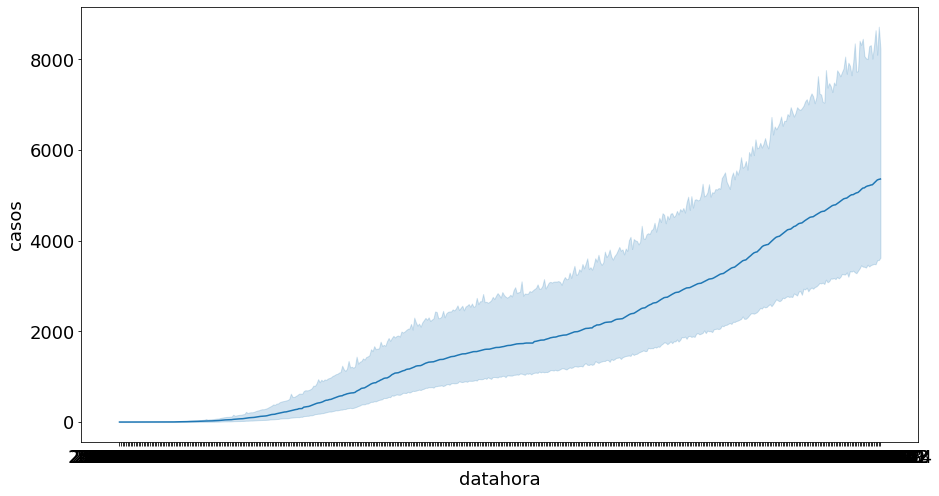

In [131]:
sns.lineplot(x='datahora', y='casos', data=dados)

**Transformando a coluna datahora num objeto datetime**

In [132]:
dados['datahora'] = pd.to_datetime(dados['datahora'], format='%Y-%m-%d')

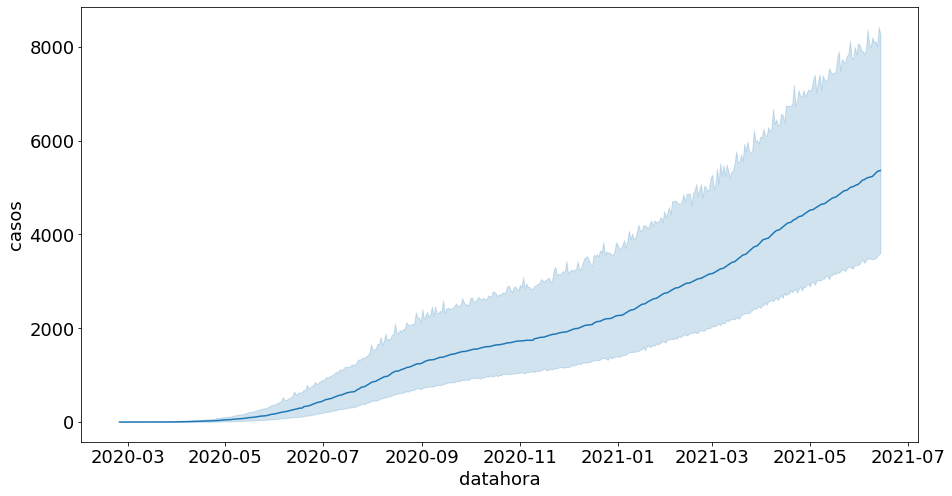

In [133]:
sns.lineplot(x='datahora', y='casos', data=dados)

**utilizando o matplotlib para configurar as figuras**

In [134]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15,8)

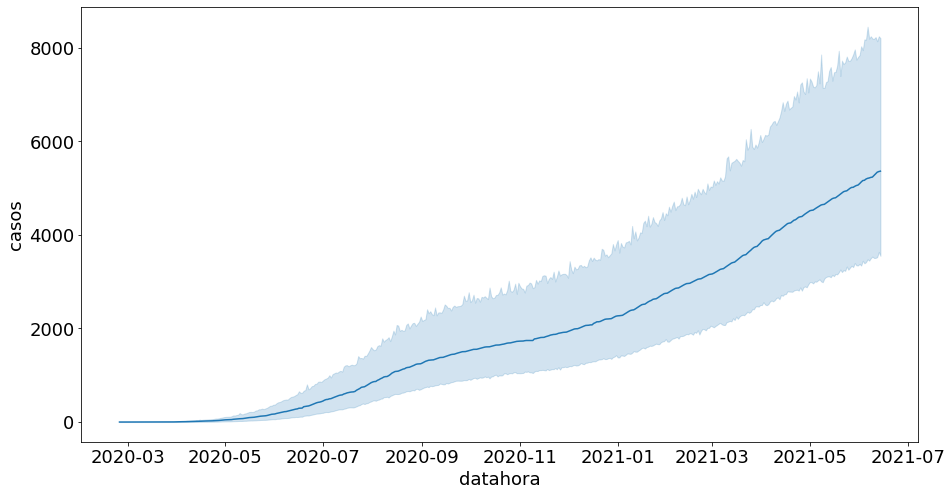

In [135]:
sns.lineplot(x='datahora', y='casos', data=dados)

**exponencial** $$e^x$$

In [136]:
eixo_x = np.linspace(-2,2,100)

In [137]:
y_exp = np.exp(eixo_x)

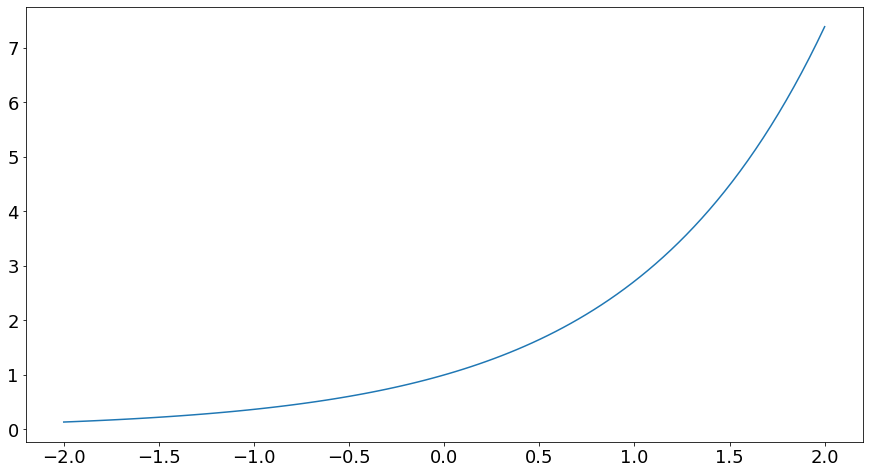

In [138]:
sns.lineplot(x=eixo_x, y=y_exp)

$$ log_2 2 = 1$$
$$ log_2 2^x = x $$
$$ log_e e^x = x $$

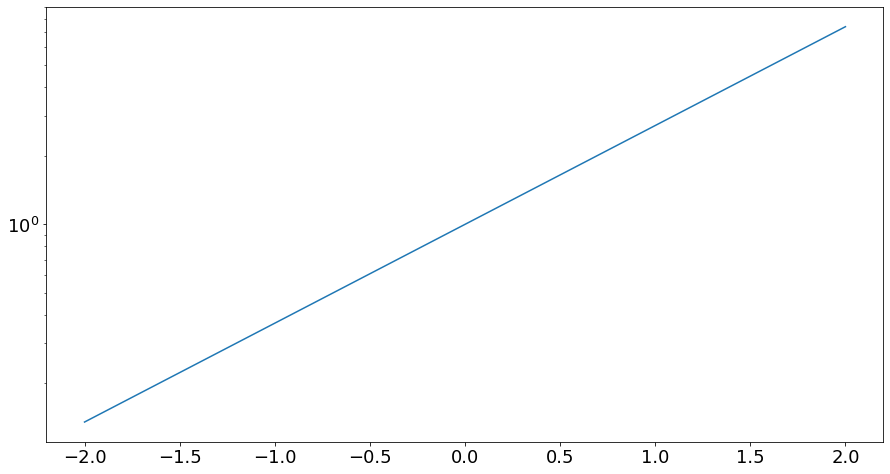

In [139]:
sns.lineplot(x=eixo_x, y=y_exp)
plt.yscale('log')

**Dados sp**

In [140]:
dados_sp = dados.query('nome_munic == "São Paulo"')
dados_sp.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
562,São Paulo,3550308,25,2,2020-02-25,1,0,0.008425,0.0,0,0,0.0,0.0,0.0,RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,-23.5329,-46.6395,9
1207,São Paulo,3550308,26,2,2020-02-26,1,0,0.008425,0.0,0,0,0.0,0.0,0.0,RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,-23.5329,-46.6395,9
1852,São Paulo,3550308,27,2,2020-02-27,1,0,0.008425,0.0,0,0,0.0,0.0,0.0,RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,-23.5329,-46.6395,9
2497,São Paulo,3550308,28,2,2020-02-28,2,1,0.016850,0.0,0,0,0.0,0.0,0.0,RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,-23.5329,-46.6395,9
3142,São Paulo,3550308,29,2,2020-02-29,2,0,0.016850,0.0,0,0,0.0,0.0,0.0,RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,-23.5329,-46.6395,9


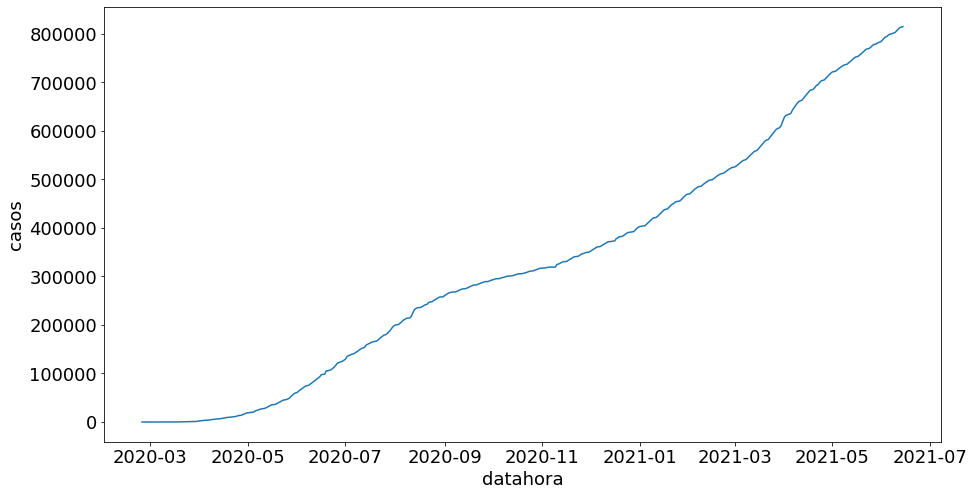

In [141]:
sns.lineplot(data=dados_sp, x='datahora', y='casos')

*trocando a escala do eixo y*

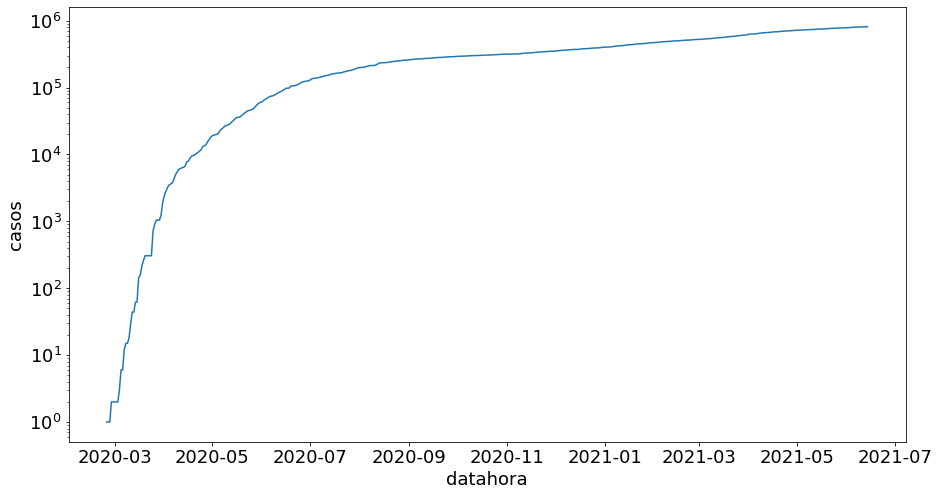

In [142]:
sns.lineplot(data=dados_sp, x='datahora', y='casos')
plt.yscale('log')

## Desafio 01 - Filtrar a base com outra função

**Método utilizando o própio df**

In [143]:
dados_sp = dados[dados['nome_munic'] == 'São Paulo']
dados_sp.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
562,São Paulo,3550308,25,2,2020-02-25,1,0,0.008425,0.0,0,0,0.0,0.0,0.0,RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,-23.5329,-46.6395,9
1207,São Paulo,3550308,26,2,2020-02-26,1,0,0.008425,0.0,0,0,0.0,0.0,0.0,RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,-23.5329,-46.6395,9
1852,São Paulo,3550308,27,2,2020-02-27,1,0,0.008425,0.0,0,0,0.0,0.0,0.0,RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,-23.5329,-46.6395,9
2497,São Paulo,3550308,28,2,2020-02-28,2,1,0.016850,0.0,0,0,0.0,0.0,0.0,RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,-23.5329,-46.6395,9
3142,São Paulo,3550308,29,2,2020-02-29,2,0,0.016850,0.0,0,0,0.0,0.0,0.0,RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,-23.5329,-46.6395,9


**Método utilizando query com valores alocados em uma variável externa. Esta variável pode conter um ou mais itens numa lista**

In [144]:
cidade_query = ['São Paulo']
dados_sp = dados.query('nome_munic in @cidade_query')
dados_sp.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
562,São Paulo,3550308,25,2,2020-02-25,1,0,0.008425,0.0,0,0,0.0,0.0,0.0,RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,-23.5329,-46.6395,9
1207,São Paulo,3550308,26,2,2020-02-26,1,0,0.008425,0.0,0,0,0.0,0.0,0.0,RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,-23.5329,-46.6395,9
1852,São Paulo,3550308,27,2,2020-02-27,1,0,0.008425,0.0,0,0,0.0,0.0,0.0,RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,-23.5329,-46.6395,9
2497,São Paulo,3550308,28,2,2020-02-28,2,1,0.016850,0.0,0,0,0.0,0.0,0.0,RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,-23.5329,-46.6395,9
3142,São Paulo,3550308,29,2,2020-02-29,2,0,0.016850,0.0,0,0,0.0,0.0,0.0,RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,-23.5329,-46.6395,9


## Desafio 02 - Escolher outro município

**Escolhendo o município de Praia Grande**

In [145]:
dados_pg = dados.query('nome_munic == "Praia Grande"')
dados_pg.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
459,Praia Grande,3541000,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,RA de Santos,12,Baixada Santista,13,316844,47218,14925,0,8.0,-24.0084,-46.4121,9
1104,Praia Grande,3541000,26,2,2020-02-26,0,0,0.0,0.0,0,0,0.0,0.0,0.0,RA de Santos,12,Baixada Santista,13,316844,47218,14925,0,8.0,-24.0084,-46.4121,9
1749,Praia Grande,3541000,27,2,2020-02-27,0,0,0.0,0.0,0,0,0.0,0.0,0.0,RA de Santos,12,Baixada Santista,13,316844,47218,14925,0,8.0,-24.0084,-46.4121,9
2394,Praia Grande,3541000,28,2,2020-02-28,0,0,0.0,0.0,0,0,0.0,0.0,0.0,RA de Santos,12,Baixada Santista,13,316844,47218,14925,0,8.0,-24.0084,-46.4121,9
3039,Praia Grande,3541000,29,2,2020-02-29,0,0,0.0,0.0,0,0,0.0,0.0,0.0,RA de Santos,12,Baixada Santista,13,316844,47218,14925,0,8.0,-24.0084,-46.4121,9


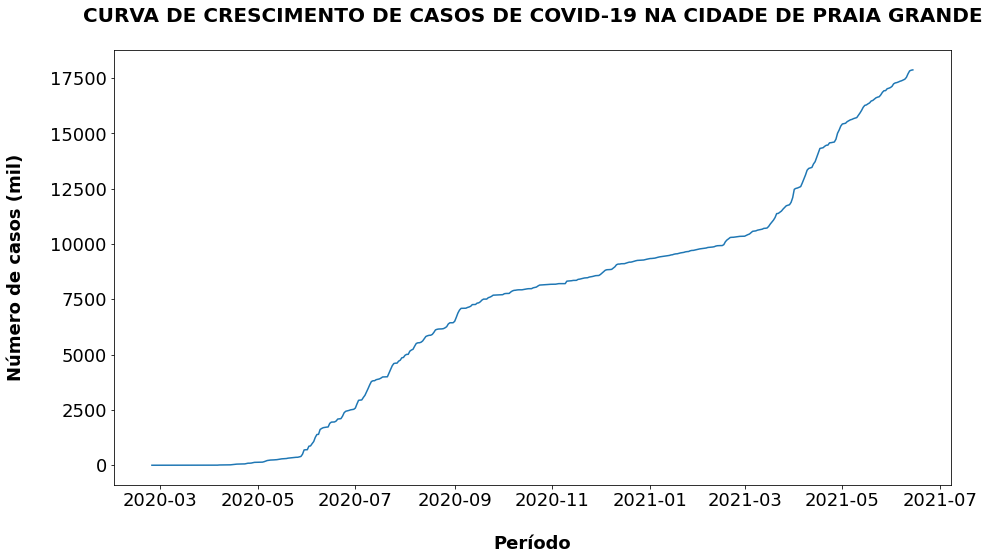

In [146]:
nome_cidade = [x for x in dados_pg.nome_munic.unique()]

s = ''
for x in nome_cidade:
  s = s + ' ' + x

sns.lineplot(data=dados_pg, x='datahora',y='casos')

plt.title('Curva de crescimento de casos de covid-19 na cidade de{}\n'.format(s).upper(), 
          weight='bold',
          fontsize=20)

plt.ylabel('Número de casos (mil)\n', weight='bold')
plt.xlabel('\nPeríodo', weight='bold')

plt.show()

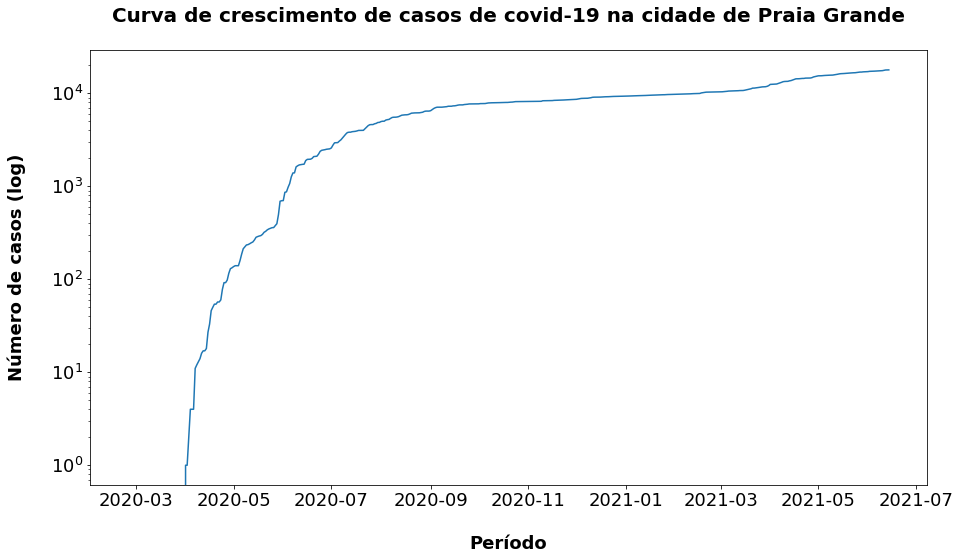

In [147]:
nome_cidade = [x for x in dados_pg.nome_munic.unique()]

s = ''
for x in nome_cidade:
  s = s + ' ' + x

sns.lineplot(data=dados_pg, x='datahora',y='casos')

plt.title('Curva de crescimento de casos de covid-19 na cidade de{}\n'.format(s), 
          weight='bold',
          fontsize=20)

plt.ylabel('Número de casos (log)\n', weight='bold')
plt.xlabel('\nPeríodo', weight='bold')

plt.yscale('log')

plt.show()

**Juntando os dados de São Paulo e Praia Grande em um df**

In [148]:
dados_sp_pg = dados_sp.append(dados_pg)
dados_sp_pg.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
562,São Paulo,3550308,25,2,2020-02-25,1,0,0.008425,0.0,0,0,0.0,0.0,0.0,RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,-23.5329,-46.6395,9
1207,São Paulo,3550308,26,2,2020-02-26,1,0,0.008425,0.0,0,0,0.0,0.0,0.0,RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,-23.5329,-46.6395,9
1852,São Paulo,3550308,27,2,2020-02-27,1,0,0.008425,0.0,0,0,0.0,0.0,0.0,RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,-23.5329,-46.6395,9
2497,São Paulo,3550308,28,2,2020-02-28,2,1,0.016850,0.0,0,0,0.0,0.0,0.0,RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,-23.5329,-46.6395,9
3142,São Paulo,3550308,29,2,2020-02-29,2,0,0.016850,0.0,0,0,0.0,0.0,0.0,RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,-23.5329,-46.6395,9


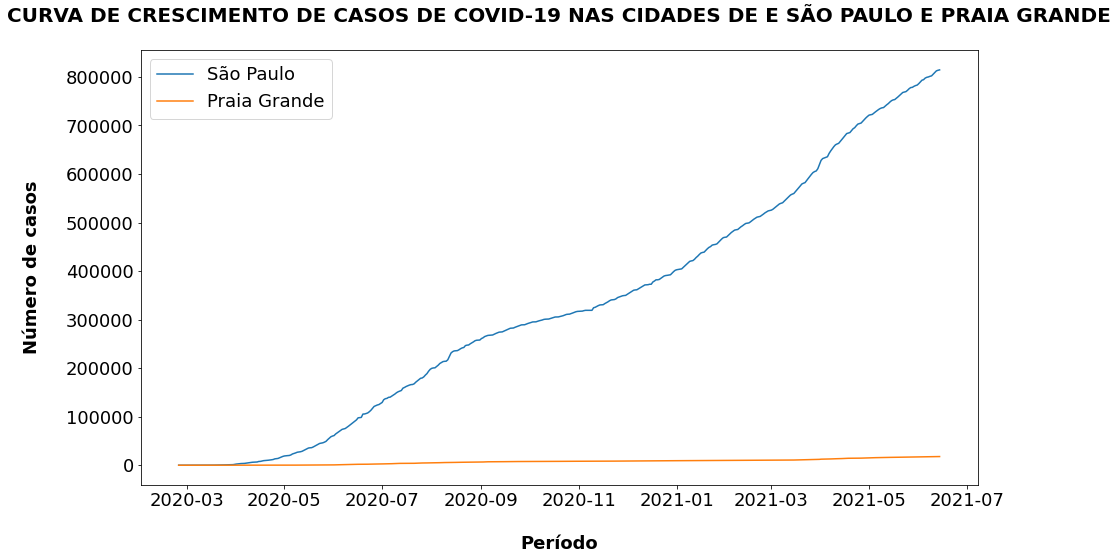

In [149]:
nome_cidade = [x for x in dados_sp_pg.nome_munic.unique()]

s = ''
for x in nome_cidade:
  s = s + ' e ' + x

sns.lineplot(data=dados_sp_pg, x='datahora', y='casos', hue='nome_munic')
plt.legend(loc=0)

plt.title('Curva de crescimento de casos de covid-19 nas cidades de{}\n'.format(s).upper(), 
          weight='bold',
          fontsize=20)

plt.ylabel('Número de casos\n', weight='bold')
plt.xlabel('\nPeríodo', weight='bold')

plt.show()

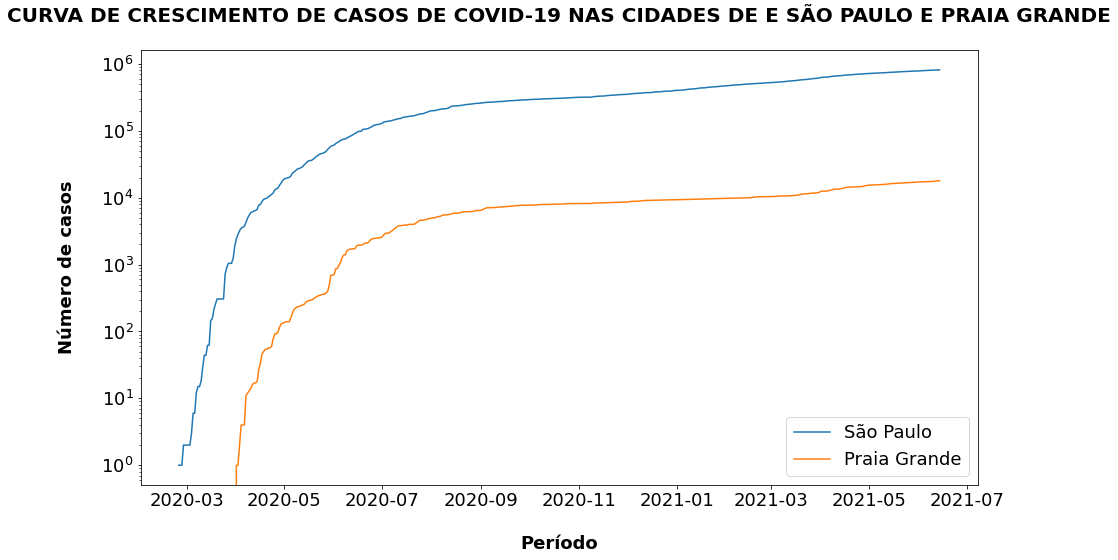

In [150]:
nome_cidade = [x for x in dados_sp_pg.nome_munic.unique()]

s = ''
for x in nome_cidade:
  s = s + ' e ' + x

ax = sns.lineplot(data=dados_sp_pg, 
             x='datahora', 
             y='casos', 
             hue='nome_munic')
# ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.legend(loc=4)

plt.title('Curva de crescimento de casos de covid-19 nas cidades de{}\n'.format(s).upper(), 
          weight='bold',
          fontsize=20)

plt.ylabel('Número de casos\n', weight='bold')
plt.xlabel('\nPeríodo', weight='bold')

plt.yscale('log')

plt.show()